# "Predicción del Abandono de Clientes en Servicios de Telecomunicaciones: Un Enfoque Basado en Ciencia de Datos"

## Introducción

En un mercado altamente competitivo como el de las telecomunicaciones, retener clientes es tan importante —y muchas veces más rentable— que adquirir nuevos. Este proyecto tiene como objetivo analizar el comportamiento de más de 7000 usuarios de una empresa de telecomunicaciones y predecir la probabilidad de que un cliente abandone el servicio (churn).

A través del análisis exploratorio de datos, visualizaciones, correlaciones y modelos de aprendizaje automático, se busca:

Identificar los factores que más influyen en la decisión de un cliente de irse.
Detectar patrones de consumo, contratación y facturación que estén asociados al abandono.
Predecir con precisión qué clientes están en riesgo de churn, para que la empresa pueda tomar decisiones proactivas de retención.
Este trabajo combina técnicas de análisis estadístico y machine learning para aportar una solución práctica y accionable a un problema de negocio real, con el fin de mejorar la fidelización y rentabilidad de la compañía.

## Entendiendo el Dataset

***Este dataset contiene información sobre clientes de un servicio de telecomunicaciones, incluyendo:***

* Datos demográficos (edad, dependientes, tipo de contrato).

* Servicios contratados (Internet, streaming, soporte técnico).

* Historial de facturación y pagos.

* Estado de abandono (Churn: si el cliente dejó el servicio o no).


💡 Objetivos del Análisis


1. Predicción de Churn (Abandono de Clientes)

Pregunta clave: ¿Podemos anticipar qué clientes tienen mayor riesgo de abandonar el servicio?

Importancia: Retener clientes es más barato que adquirir nuevos.

Impacto: Ayuda a diseñar estrategias de retención y fidelización.

2. Predicción del Gasto Mensual de los Clientes

Pregunta clave: ¿Cuánto gastará un cliente en el próximo mes?

Importancia: Permite optimizar precios y personalizar ofertas.

Impacto: Mejora la rentabilidad y la satisfacción del cliente.

🔄 Beneficios del Análisis

✅ Reducción de la tasa de abandono.

✅ Identificación de clientes rentables.

✅ Estrategias de marketing más efectivas.


# Importación de datos

Importacion de los datos (Kaggle)

# Requisitos de instalación
!pip install kagglehub seaborn pandas matplotlib


In [6]:
# Importaciones
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Download latest version
path = kagglehub.dataset_download("kapturovalexander/customers-churned-in-telecom-services")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Lautaro\.cache\kagglehub\datasets\kapturovalexander\customers-churned-in-telecom-services\versions\3


In [8]:
print(os.listdir(path))

['customer_churn_telecom_services.csv']


In [9]:
df = pd.read_csv(f"{path}/customer_churn_telecom_services.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Datos incluidos en el dataset

| **Columna**            | **Descripción** |
|------------------------|---------------------------------------------|
| `gender`              | Género del cliente (Masculino/Femenino). |
| `SeniorCitizen`       | Indica si el cliente es una persona mayor (1 = Sí, 0 = No). |
| `Partner`            | Indica si el cliente tiene pareja (Sí/No). |
| `Dependents`         | Indica si el cliente tiene dependientes (Sí/No). |
| `tenure`             | Número de meses que el cliente ha permanecido en la empresa. |
| `PhoneService`       | Indica si el cliente tiene servicio telefónico (Sí/No). |
| `MultipleLines`      | Indica si el cliente tiene múltiples líneas telefónicas (No, Sí, No hay servicio telefónico). |
| `InternetService`    | Tipo de servicio de Internet contratado (DSL, Fibra óptica, No tiene Internet). |
| `OnlineSecurity`     | Indica si el cliente tiene servicio de seguridad en línea (Sí, No, No tiene servicio de Internet). |
| `OnlineBackup`       | Indica si el cliente tiene servicio de respaldo en línea (Sí, No, No tiene servicio de Internet). |
| `DeviceProtection`   | Indica si el cliente tiene protección de dispositivos (Sí, No, No tiene servicio de Internet). |
| `TechSupport`        | Indica si el cliente cuenta con soporte técnico (Sí, No, No tiene servicio de Internet). |
| `StreamingTV`        | Indica si el cliente tiene servicio de TV en streaming (Sí, No, No tiene servicio de Internet). |
| `StreamingMovies`    | Indica si el cliente tiene servicio de streaming de películas (Sí, No, No tiene servicio de Internet). |
| `Contract`          | Tipo de contrato del cliente (Mes a mes, Un año, Dos años). |
| `PaperlessBilling`   | Indica si el cliente tiene facturación electrónica (Sí/No). |
| `PaymentMethod`      | Método de pago utilizado (Cheque electrónico, Cheque en papel, Transferencia bancaria, Tarjeta de crédito). |
| `MonthlyCharges`     | Monto que el cliente paga mensualmente por los servicios contratados. |
| `TotalCharges`       | Importe total cobrado al cliente hasta la fecha. |
| `Churn`             | Variable objetivo: indica si el cliente ha abandonado la empresa (Sí/No). |


## Exploracion preliminar

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


***Conclusiones***

* Solo la variable "TotalCharges" presenta nulos
* Las varibles numericas estan correctas en formato float
* Las variables booleans estan en formato object (Exepto "SeniorCitizen")

In [11]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7032.0,2283.30,2266.77,18.80,401.45,1397.48,3794.74,8684.80


***Insights rápidos:***

* Tenure (antigüedad del cliente) varía bastante, con clientes nuevos (0 meses) y clientes con hasta 72 meses.
* Cargos mensuales (MonthlyCharges) tienen una distribución amplia, con un rango de 18.25 a 118.75.
* TotalCharges parece acumulativo, pero presenta valores nulos que debemos manejar.

# Limpieza y Preprocesamiento

**Corección de nulos**

In [12]:
# Ver cantidad de valores nulos
print(df['TotalCharges'].isnull().sum())

# Mostrar filas donde 'TotalCharges' es nulo
df[df['TotalCharges'].isnull()]


11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
# Verificar si los valores nulos de TotalCharges tienen tenure = 0
df[df['TotalCharges'].isnull()]['tenure'].value_counts()


tenure
0    11
Name: count, dtype: int64

***Los valores nulos coresponden a clientes nuevos***
* Vamos a rellenarlos con "0"

In [14]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Ver cantidad de valores nulos
print(df['TotalCharges'].isnull().sum())


0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Se rellenaron los valores satisfactoriamente

# EDA

## Visualizaciones de los puntos clave

***Analisis de variables numéricas***

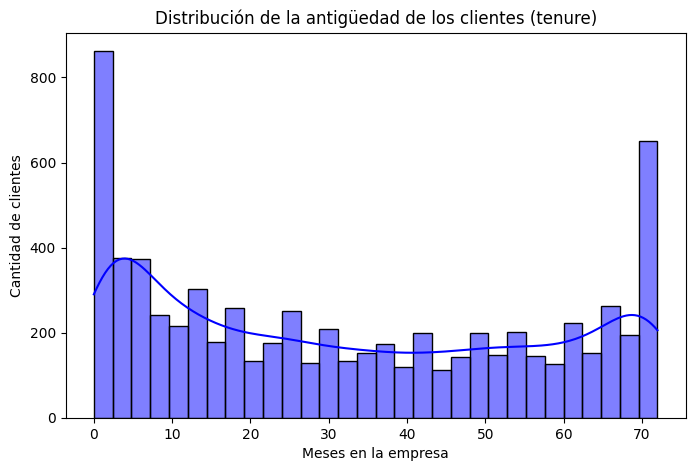

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=30, kde=True, color='blue')
plt.title('Distribución de la antigüedad de los clientes (tenure)')
plt.xlabel('Meses en la empresa')
plt.ylabel('Cantidad de clientes')
plt.show()


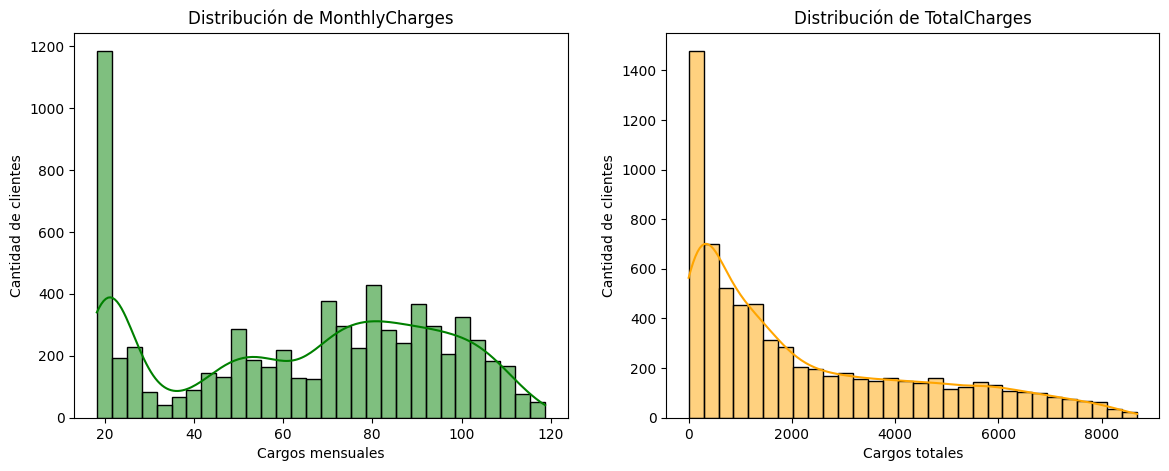

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# MonthlyCharges
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='green', ax=axes[0])
axes[0].set_title('Distribución de MonthlyCharges')
axes[0].set_xlabel('Cargos mensuales')
axes[0].set_ylabel('Cantidad de clientes')

# TotalCharges
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribución de TotalCharges')
axes[1].set_xlabel('Cargos totales')
axes[1].set_ylabel('Cantidad de clientes')

plt.show()


C:\Users\Lautaro\AppData\Local\Temp\ipykernel_8216\220939718.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette=['blue', 'red'])


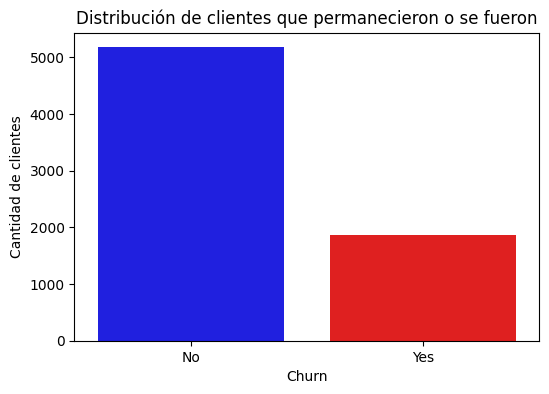

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette=['blue', 'red'])
plt.title('Distribución de clientes que permanecieron o se fueron')
plt.xlabel('Churn')
plt.ylabel('Cantidad de clientes')
plt.show()


C:\Users\Lautaro\AppData\Local\Temp\ipykernel_8216\1965012461.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette=['blue', 'red'])


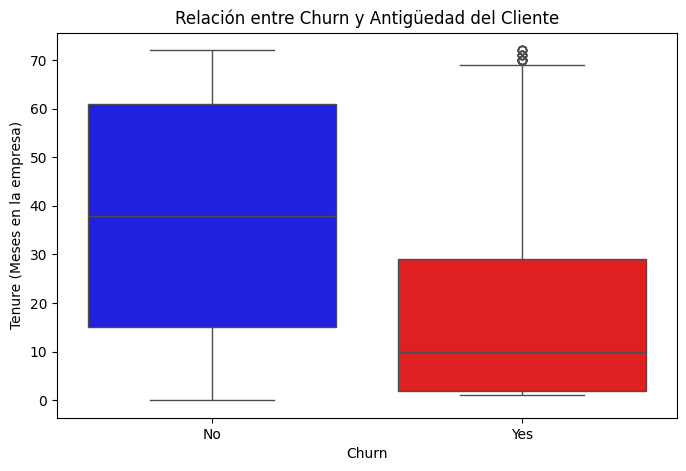

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='tenure', palette=['blue', 'red'])
plt.title('Relación entre Churn y Antigüedad del Cliente')
plt.xlabel('Churn')
plt.ylabel('Tenure (Meses en la empresa)')
plt.show()


C:\Users\Lautaro\AppData\Local\Temp\ipykernel_8216\1793834539.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['blue', 'red'])


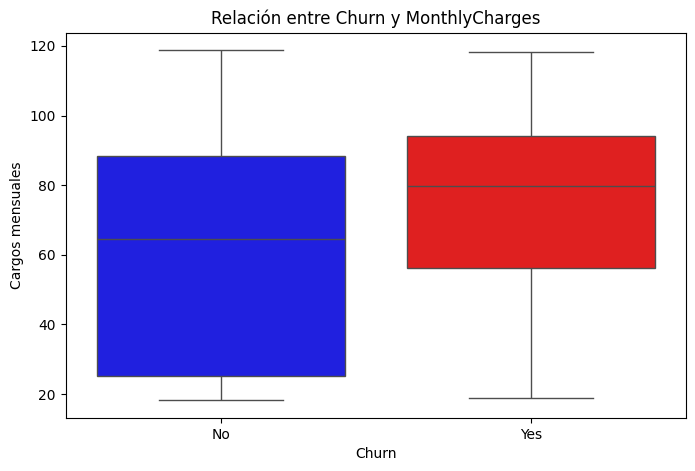

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['blue', 'red'])
plt.title('Relación entre Churn y MonthlyCharges')
plt.xlabel('Churn')
plt.ylabel('Cargos mensuales')
plt.show()


***Primeras conclusiones***

1. Antigüedad de los clientes (tenure)

Hay una gran cantidad de clientes con muy poca antigüedad (cercana a 0 meses) y otro pico importante en 72 meses, lo que podría indicar clientes recientes y clientes de largo plazo con contratos fijos.

2. Cargos mensuales y totales

Los cargos mensuales presentan una distribución variada con una concentración en valores bajos y algunos picos en valores más altos.
Los cargos totales están sesgados a la derecha, lo que es esperable, ya que los clientes con mayor tiempo en la empresa han pagado más.

3. Churn (deserción de clientes)

La mayoría de los clientes han permanecido en la empresa, pero hay una proporción considerable de deserción (~27%), lo que indica un problema relevante que debe analizarse más a fondo.

4. Relación entre Churn y Antigüedad (tenure)

Los clientes que se quedaron tienen una mayor antigüedad en la empresa (mediana > 35 meses).
Los clientes que se fueron suelen tener menos de 10 meses de antigüedad.

Insight: El abandono es más común en los primeros meses del servicio, lo cual podría reflejar insatisfacción inicial o falta de fidelización temprana.

5. Relación entre Churn y Cargos Mensuales (MonthlyCharges)

Los clientes que abandonaron tienden a pagar cargos mensuales más altos (mediana cercana a 80).
Los que se quedan tienen un rango más amplio, pero con mediana alrededor de 65.

Insight: Cargos más altos están asociados con una mayor probabilidad de churn, posiblemente por percepción de bajo valor/costo-beneficio.

** Conclusión general hasta ahora

El churn parece estar altamente influenciado por:

* Antigüedad baja en la empresa (clientes nuevos abandonan más).
* Altos costos mensuales, posiblemente percibidos como injustificados.

***Analisis de variables categóricas***

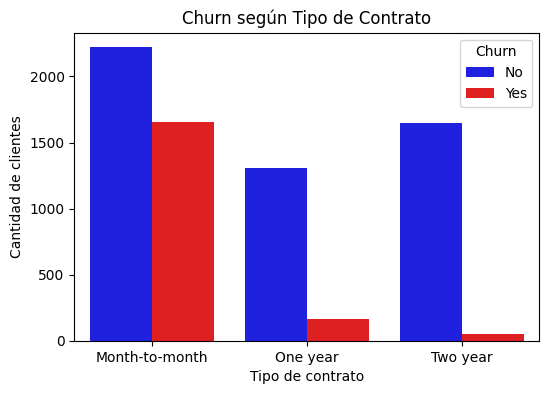

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn', palette=['blue', 'red'])
plt.title('Churn según Tipo de Contrato')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Tipo de contrato')
plt.show()


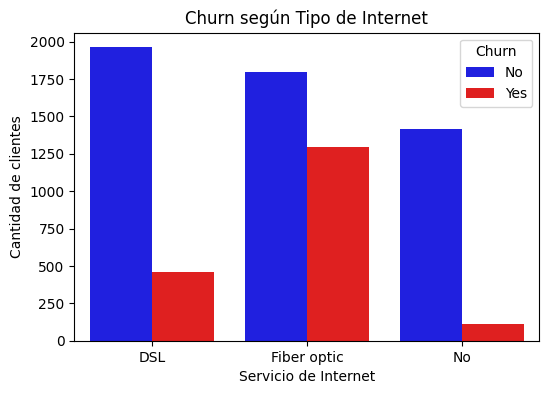

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='InternetService', hue='Churn', palette=['blue', 'red'])
plt.title('Churn según Tipo de Internet')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Servicio de Internet')
plt.show()


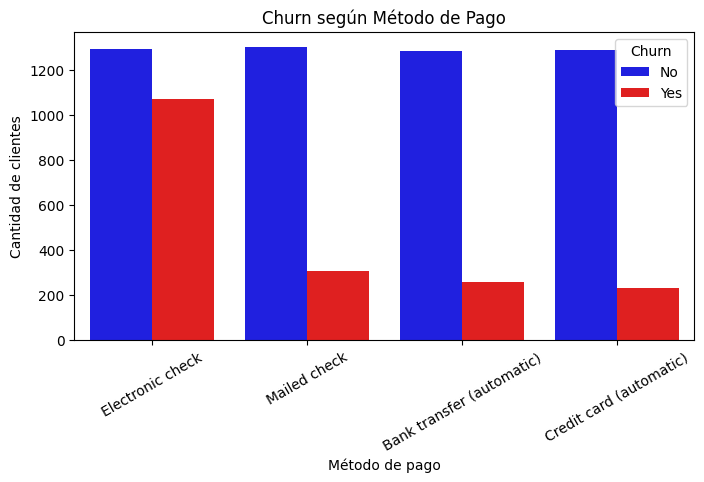

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette=['blue', 'red'])
plt.title('Churn según Método de Pago')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Método de pago')
plt.xticks(rotation=30)
plt.show()


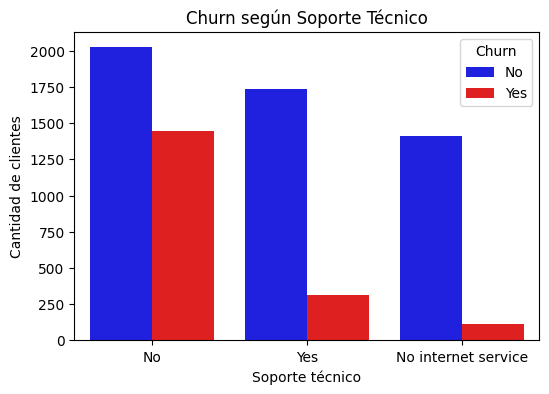

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='TechSupport', hue='Churn', palette=['blue', 'red'])
plt.title('Churn según Soporte Técnico')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Soporte técnico')
plt.show()


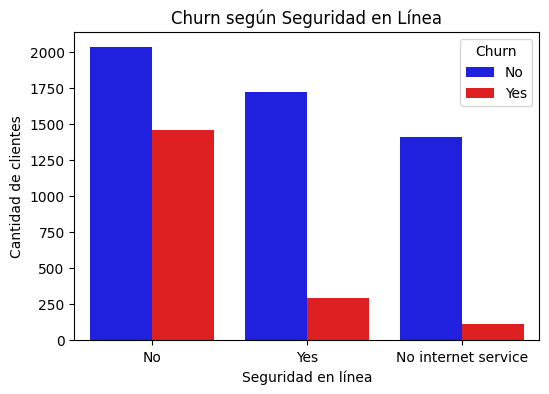

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette=['blue', 'red'])
plt.title('Churn según Seguridad en Línea')
plt.ylabel('Cantidad de clientes')
plt.xlabel('Seguridad en línea')
plt.show()


***Conclusiones***

 1. Tipo de contrato (Contract)
Los contratos mes a mes tienen el mayor nivel de churn por lejos.
Contratos de 1 o 2 años tienen tasas de abandono muy bajas.
Insight: Los contratos a largo plazo están asociados a mayor fidelidad, probablemente por compromiso o penalidades.

2. Tipo de internet (InternetService)
Clientes con Fibra óptica tienen más churn que aquellos con DSL.
Clientes sin servicio de Internet casi no abandonan (probablemente porque tienen solo teléfono fijo).
Insight: Fibra óptica puede implicar costos más altos o expectativas de servicio más exigentes.

3. Método de pago (PaymentMethod)
Los que pagan con cheque electrónico tienen notablemente más churn.
Métodos automáticos como tarjeta o débito bancario están asociados a mayor retención.
Insight: Los métodos automáticos parecen reflejar mayor estabilidad o conveniencia.

4. Soporte técnico (TechSupport)
Clientes sin soporte técnico tienen mucho más churn.
Quienes cuentan con soporte abandonan en menor proporción.
Insight: El soporte técnico puede jugar un rol clave en la satisfacción del cliente.

5. Seguridad en línea (OnlineSecurity)
El patrón es idéntico al del soporte técnico: tener el servicio reduce el churn.
Insight: Servicios de valor agregado como seguridad generan retención.

** Conclusión general:
Las variables categóricas muestran que el churn se relaciona con:

* Bajo compromiso (contratos cortos).
* Costo o percepción de servicio (Fibra óptica, pagos manuales).
* Falta de servicios de soporte o seguridad.

## Análisis de correlaciones

### Preparación previa

* como Churn es una variable categórica (Yes / No), la convertimos en numérica:

In [26]:
df['Churn_encoded'] = df['Churn'].map({'No': 0, 'Yes': 1})


Analisamos que otras varibles hay booleanas

In [27]:
# Verificamos columnas con valores 'Yes'/'No' o 'Sí'/'No'
binary_cols = [col for col in df.columns
               if df[col].dtype == 'object' and df[col].nunique() == 2 and col != 'Churn']

# Mostrar columnas identificadas
print(binary_cols)


['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


In [28]:
# Convertimos todas las variables binarias a 0/1
df_encoded = df.copy()
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0, 'Female': 1, 'Male': 0})  # por si hay variantes


In [29]:
# Verificamos valores únicos de cada variable
for col in df_encoded.columns:
    print(f"\n Columna: {col}")
    print(df_encoded[col].unique())


 Columna: gender
[1 0]

 Columna: SeniorCitizen
[0 1]

 Columna: Partner
[1 0]

 Columna: Dependents
[0 1]

 Columna: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 Columna: PhoneService
[0 1]

 Columna: MultipleLines
['No phone service' 'No' 'Yes']

 Columna: InternetService
['DSL' 'Fiber optic' 'No']

 Columna: OnlineSecurity
['No' 'Yes' 'No internet service']

 Columna: OnlineBackup
['Yes' 'No' 'No internet service']

 Columna: DeviceProtection
['No' 'Yes' 'No internet service']

 Columna: TechSupport
['No' 'Yes' 'No internet service']

 Columna: StreamingTV
['No' 'Yes' 'No internet service']

 Columna: StreamingMovies
['No' 'Yes' 'No internet service']

 Columna: Contract
['Month-to-month' 'One year' 'Two year']

 Columna: PaperlessBilling
[1 0]

 Columna: PaymentMethod
['Electronic check' 'Mailed 

In [30]:
# convertimos en booleanas las lineas 'MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
cols_to_clean = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Reemplazar 'No internet service' y 'No phone service' por 'No'
for col in cols_to_clean:
    df_encoded[col] = df_encoded[col].replace(['No internet service', 'No phone service'], 'No')

# Mapear Yes/No a 1/0
for col in cols_to_clean:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})


In [31]:
# Realizamos un (One-Hot Encoding) a InternetService, Contract, PaymentMethod
df_encoded = pd.get_dummies(df_encoded,
                             columns=['InternetService', 'Contract', 'PaymentMethod'],
                             drop_first=True)


In [32]:
df_encoded['Churn_encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [33]:
# visualisamos como quedo el dataframe
df_encoded.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,Churn_encoded,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,No,0,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,1889.50,No,0,False,False,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,108.15,Yes,1,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,1840.75,No,0,False,False,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,151.65,Yes,1,True,False,False,False,False,True,False


In [39]:
# Detectar columnas booleanas
bool_cols = df_encoded.select_dtypes(include='bool').columns

# Convertir a int (0/1)
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [40]:
#Nos aserguramos que todos los datos se convirtieron y no hay nulos
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

Observación:
* Femenino paso a "1"
* Masculino paso a "0"

### matriz de correlación y visualizarla con un heatmap

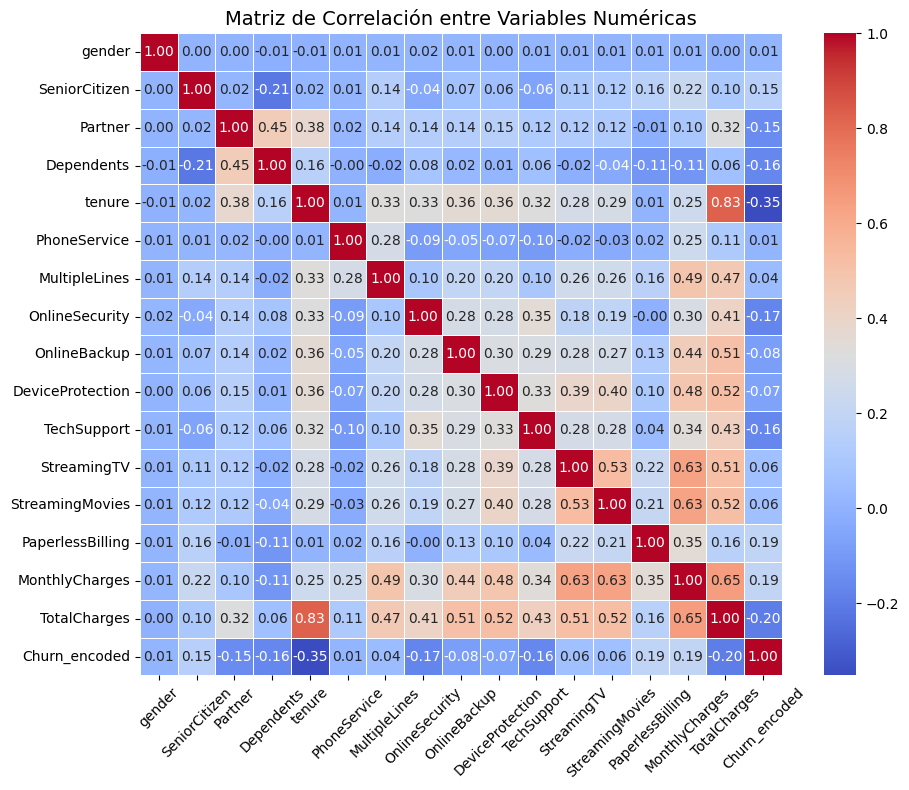

In [41]:
# Selección de columnas numéricas transformadas
numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

# Cálculo de la matriz de correlación
corr_matrix = numeric_df.corr()

# Visualización
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            square=True,
            linewidths=0.5,
            cbar=True)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


***Análisis de Correlación con Churn***

Con el dataset completamente transformado a variables numéricas, se puede observar cómo cada una se relaciona con el abandono de clientes (`Churn_encoded`).

| **Variable**         | **Correlación con `Churn_encoded`** | **Interpretación** |
|----------------------|--------------------------------------|---------------------|
| `tenure`             | **-0.35**                            | Los clientes con menos antigüedad son más propensos a abandonar. |
| `TotalCharges`       | -0.20                                | Clientes con menor gasto acumulado (por menor permanencia) tienden a irse. |
| `TechSupport`        | -0.16                                | Tener soporte técnico reduce la probabilidad de churn. |
| `OnlineSecurity`     | -0.17                                | La seguridad en línea también se asocia a menor abandono. |
| `Partner`            | -0.15                                | Clientes con pareja muestran mayor fidelidad. |
| `Dependents`         | -0.16                                | Tener personas a cargo se relaciona con menor churn. |
| `DeviceProtection`   | -0.08                                | Aporta, aunque de forma más débil, a la retención. |
| `MonthlyCharges`     | +0.19                                | Tarifas mensuales altas se relacionan con mayor abandono. |
| `PaperlessBilling`   | +0.19                                | La facturación digital se vincula a mayor churn                              |
| `SeniorCitizen`      | +0.15                                | Los adultos mayores tienen una leve mayor tasa de abandono. |
| `gender`, `PhoneService`, `MultipleLines`, `StreamingTV`, `StreamingMovies`, `OnlineBackup` | ~0 | Sin correlación significativa con el churn. |

---

###  Conclusión general:

- Las variables **más influyentes en el churn** son:  
  - Negativas (mayor permanencia): `tenure`, `TotalCharges`, `TechSupport`, `OnlineSecurity`.  
  - Positivas (mayor abandono): `MonthlyCharges`, `PaperlessBilling`, `SeniorCitizen`.

- Varias variables (`gender`, `PhoneService`, `Streaming`) no tienen valor predictivo claro y podrían excluirse del modelo.

---




# Modelado Predictivo (Próximamente)